In [2]:
import pandas as pd
import pyfas as fa

# Tab files

A tab file contains thermodynamic properties pre-calculated by a thermodynamic simulator like PVTsim. It is good practice to analyze these text files *before* using them. Unfortunately there are several file layouts (`key`, `fixed`, with just a fluid, etc.). The `Tab` class handles some (most?) of the possible cases but not necessarily all the combinations.  
The only public method is `extract_all` and returns a pandas dataframe with the thenrmodynamic properties.
At this moment in time the dtaframe obtained is not unique, it depends on the tab format and on the number of fluids in the original tab file. Room to improve here.

### Tab file loading

In [14]:
tab_path = '../../pyfas/test/test_files/'
fname = '3P_single-fluid_key.tab'
tab = fa.Tab(tab_path+fname)

### Extraction

In [15]:
tab.export_all()

In [16]:
tab.data

,"""1"""
CPG,"[1898.12, 1905.92, 1913.71, 1921.51, 1929.3, 1..."
CPHL,"[1610.0, 1617.06, 1623.76, 1630.02, 1635.79, 1..."
CPWT,"[3454.74, 3458.93, 3463.33, 3467.94, 3472.76, ..."
DROGDP,"[8.4946e-06, 8.42111e-06, 8.34888e-06, 8.27788..."
DROGDT,"[-0.000323057, -0.000317492, -0.00031207, -0.0..."
DROHLDP,"[4.47091e-07, 4.5376e-07, 4.60533e-07, 4.67363..."
DROHLDT,"[-0.694011, -0.693068, -0.691885, -0.69043, -0..."
DROWTDP,"[5.24381e-07, 5.22483e-07, 5.1907e-07, 5.14565..."
DROWTDT,"[0.158913, 0.142489, 0.120409, 0.0942844, 0.06..."
HG,"[-19279.3, -14920.5, -10543.9, -6149.34, -1736..."


Some key info about the tab file are provided as `tab.metadata`

In [17]:
tab.metadata

{'fluids': [' "1"'],
 'nfluids': 1,
 'p_array': array([  1.00000000e+04,   1.01325000e+05,   7.38958000e+05,
          1.46792000e+06,   2.19688000e+06,   2.92583000e+06,
          3.65479000e+06,   4.38375000e+06,   5.11271000e+06,
          5.84167000e+06,   6.57063000e+06,   7.29958000e+06,
          8.02854000e+06,   8.75750000e+06,   9.48646000e+06,
          1.02154000e+07,   1.09444000e+07,   1.16733000e+07,
          1.24023000e+07,   1.31313000e+07,   1.38602000e+07,
          1.45892000e+07,   1.53181000e+07,   1.60471000e+07,
          1.67760000e+07,   1.75050000e+07,   1.82340000e+07,
          1.89629000e+07,   1.96919000e+07,   2.04208000e+07,
          2.11498000e+07,   2.18788000e+07,   2.26077000e+07,
          2.33367000e+07,   2.40656000e+07,   2.47946000e+07,
          2.55235000e+07,   2.62525000e+07,   2.69815000e+07,
          2.77104000e+07,   2.84394000e+07,   2.91683000e+07,
          2.98973000e+07,   3.06263000e+07,   3.13552000e+07,
          3.20842000e+0

### Plotting

Here under an example of a 3D plot of the liquid hydropcarbon viscosity

In [48]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools as it

def plot_property_keyword(pressure, temperature, thermo_property):
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111, projection='3d')
    X = []
    Y = []
    for x, y in it.product(pressure, temperature):
        X.append(x/1e5)
        Y.append(y) 
    ax.scatter(X, Y, thermo_property)
    ax.set_ylabel('Temperature [C]')
    ax.set_xlabel('Pressure [bar]')
    ax.set_xlim(0, )
    ax.set_title('ROHL')
    return fig

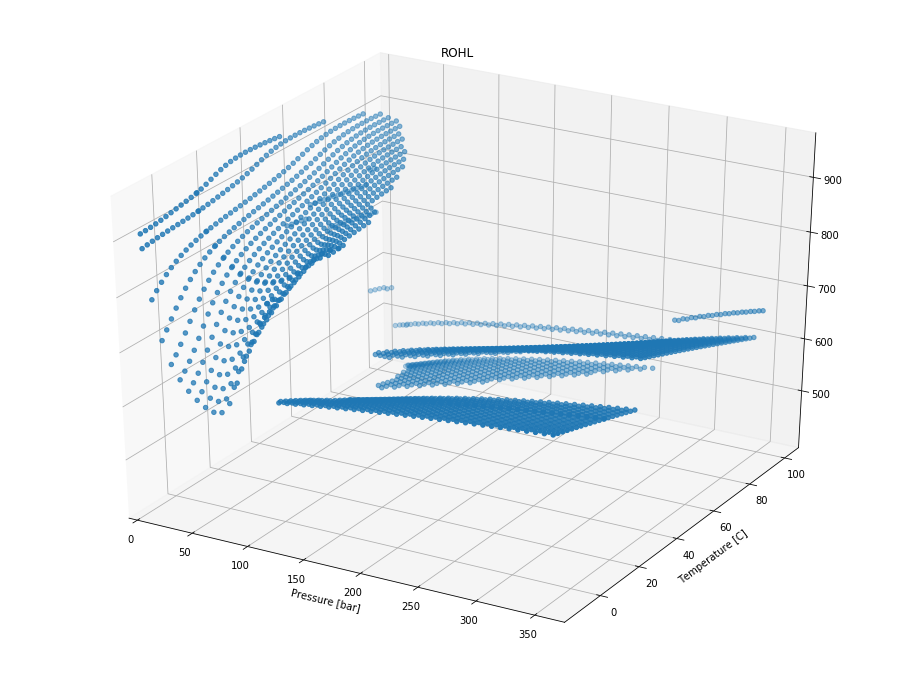

In [49]:
plot_property_keyword(tab.metadata['p_array'],
                      tab.metadata['t_array'],
                      tab.data.T['ROHL'].values[0])                      